In [132]:
import random as rd
import numpy as np
np.random.seed(42)

In [133]:
X = np.random.uniform(low=0, high=1000, size=(100,2))

In [135]:
class Kmeans:
  def __init__(self,arr,K,iter=100):
    """ Initialising variables 
        arr: array
        k: number of clusters
        iter: number of iterations
        m: arr.shape[0]
        n: arr.shape[1]
        centroids: empty array having shape n x 0
    """
    self.arr = arr
    self.k = K
    self.iter = iter
    self.m,self.n = arr.shape
    self.cluster_points = {}
    self.centroids=np.array([]).reshape(n,0)
    self.initialize_centroids()

  
  def initialize_centroids(self):
    """ assigns the centroids randomly """
    for i in range(self.k):
       rand=rd.randint(0,self.m-1)
       self.centroids=np.c_[self.centroids,self.arr[rand]]
  
  def fit(self):
    """ for each iteration:
          assigns an empty array eucDist
          for each centroid:
            calculates the distance in squared between all points of array and that centroid 
          c --> cluster number for each point in array
          then
          an empty dictionary res is initialised which for each cluster contains an empty array at first
          then each point is saved to it's assigned cluster key in res, as we iterate through number of points
          here c[i] contains the cluster number assigned to point arr[i]

          finally we calculate the mean of all points in a cluster to form a new centroid for that cluster
          """
    for i in range(self.iter):

        eucDist=np.array([]).reshape(self.m,0)
        for k in range(self.k):
            tmp=np.sum((self.arr-self.centroids[:,k])**2,axis=1)
            eucDist=np.c_[eucDist,tmp]
        c=np.argmin(eucDist,axis=1)+1

        res={}
        for k in range(self.k):
            res[k+1]=np.array([]).reshape(2,0)
        for i in range(self.m):
            res[c[i]]=np.c_[res[c[i]],self.arr[i]]
        for k in range(self.k):
            res[k+1]=res[k+1].T

        for k in range(self.k):
            self.centroids[:,k]=np.mean(res[k+1],axis=0)
        self.result = res

  def results(self):
    """print the results, should be used after fit method """
    return {'centroids':self.centroids.T,'clustered_points':self.result}

  def visualize(self):
      """ depending on the number of clusters, (r,g,b) values and labels for all clusters are formed and plotted"""
      color=[(rd.random(),rd.random(),rd.random()) for i in range(self.k)]
      labels=['cluster_'+str(i) for i in range(1,self.k+1)]
      plt.figure(figsize=(10,5))
      for k in range(self.k):
          plt.scatter(self.result[k+1][:,0],self.result[k+1][:,1],c=[color[k]],label=labels[k])
      plt.scatter(self.centroids[0,:],self.centroids[1,:],s=300,c='yellow',label='Centroids')

      plt.xlabel('X')
      plt.ylabel('Y')
      plt.legend()
      plt.show()


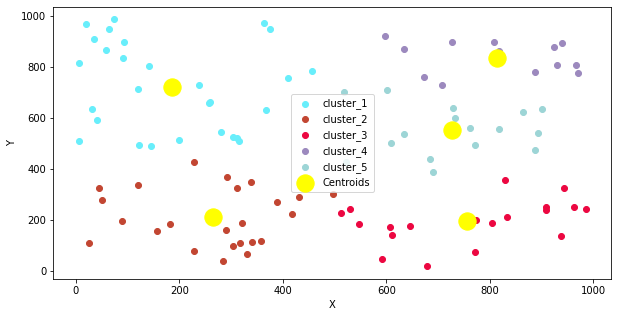

In [136]:
km = Kmeans(X,5,100)
km.fit()
km.results()
km.visualize()